In [48]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from matplotlib import pyplot

In [49]:
# High Income category
df = pd.read_excel(r"C:\Users\Madhawa Hulangamuwa\Desktop\Data Preocessing\FD Index\FD_index_final.xlsx")
df = df.set_index('year')
H_income = df['HighIncome']
L_income = np.diff(df['LowIncome'])
LM_income = np.diff(df['LowerMiddleIncome'])
UM_income = np.diff(boxcox(df["UpperMiddleIncome"].values,lmbda = 3))

In [50]:
df.head()

,HighIncome,LowIncome,LowerMiddleIncome,UpperMiddleIncome
year,,,,
1987,0.442170,0.103273,0.188252,0.250367
1988,0.437630,0.100825,0.176691,0.267149
1989,0.448215,0.104761,0.172930,0.272981
1990,0.436333,0.109126,0.178302,0.272374
1991,0.430653,0.106722,0.145982,0.235422


In [51]:
H_income

year
1987    0.442170
1988    0.437630
1989    0.448215
1990    0.436333
1991    0.430653
1992    0.436165
1993    0.476213
1994    0.496233
1995    0.498117
1996    0.512721
1997    0.556057
1998    0.580594
1999    0.591197
2000    0.605101
2001    0.608105
2002    0.578941
2003    0.599646
2004    0.607855
2005    0.609492
2006    0.608396
2007    0.601107
2008    0.583610
2009    0.588922
2010    0.588205
2011    0.573527
2012    0.545206
2013    0.545712
2014    0.532968
2015    0.550247
2016    0.550051
2017    0.550715
2018    0.548231
2019    0.537732
Name: HighIncome, dtype: float64

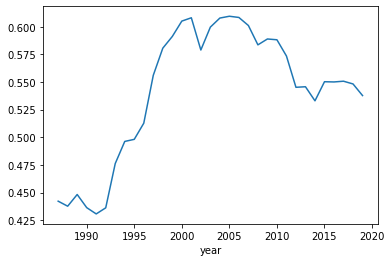

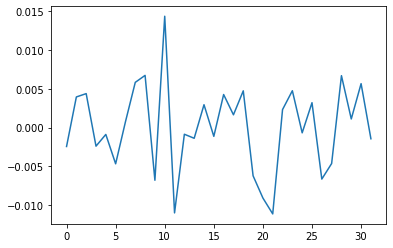

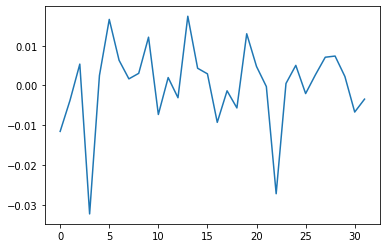

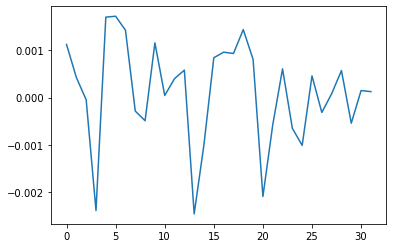

In [52]:
H_income.plot()
pyplot.show()

pyplot.plot(L_income)
pyplot.show()

pyplot.plot(LM_income)
pyplot.show()

pyplot.plot(UM_income)
pyplot.show()

In [53]:
simple_average = H_income.rolling(window=3).mean().shift(1)

In [54]:
simple_average

year
1987         NaN
1988         NaN
1989         NaN
1990    0.442672
1991    0.440726
1992    0.438400
1993    0.434383
1994    0.447677
1995    0.469537
1996    0.490188
1997    0.502357
1998    0.522298
1999    0.549791
2000    0.575949
2001    0.592297
2002    0.601467
2003    0.597382
2004    0.595564
2005    0.595481
2006    0.605664
2007    0.608581
2008    0.606332
2009    0.597704
2010    0.591213
2011    0.586913
2012    0.583552
2013    0.568980
2014    0.554815
2015    0.541295
2016    0.542976
2017    0.544422
2018    0.550338
2019    0.549666
Name: HighIncome, dtype: float64

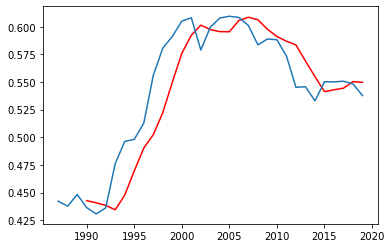

In [55]:
import matplotlib.pyplot as pyplot

pyplot.plot(simple_average,color = 'red')
pyplot.plot(H_income)
#print(simple_average)

In [ ]:
# H_income['moving_average'] = H_income.rolling(window=3).mean().shift(1)

In [ ]:
# H_income

In [56]:
def wma(weights):
    def calc(x):
        return(weights*x).mean()
    return calc

In [71]:
weighted_moving_average = H_income.rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

<AxesSubplot:xlabel='year'>

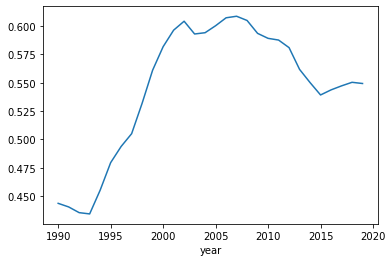

In [59]:
weighted_moving_average.plot()

In [ ]:
result

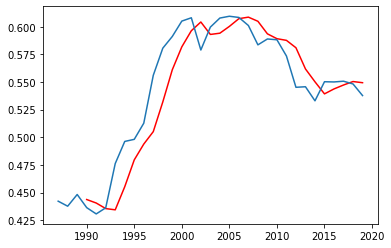

In [60]:
import matplotlib.pyplot as pyplot

pyplot.plot(weighted_moving_average,color = 'red')
pyplot.plot(H_income)


In [64]:
exponential_moving_average = H_income.ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

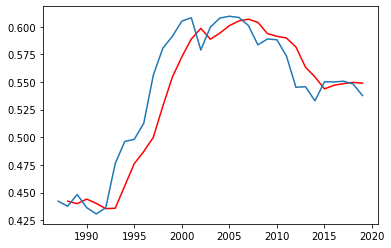

In [65]:
import matplotlib.pyplot as pyplot

pyplot.plot(exponential_moving_average,color = 'red')
pyplot.plot(H_income)


In [66]:
exponential_smoothing = H_income.ewm(alpha=0.7, adjust=False, min_periods=3).mean().shift(1)

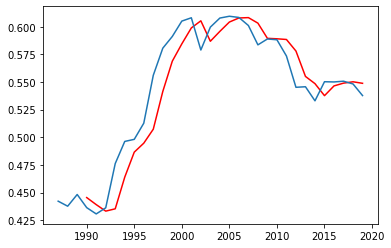

In [67]:
import matplotlib.pyplot as pyplot

pyplot.plot(exponential_smoothing,color = 'red')
pyplot.plot(H_income)

In [69]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(H_income,weighted_moving_average))
print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [33, 30]

In [73]:
((H_income - weighted_moving_average)**2).mean()**0.5

0.022115834382843508

In [74]:
((H_income - exponential_smoothing)**2).mean()**0.5

0.01971914095358734

0    0.0072
dtype: float64

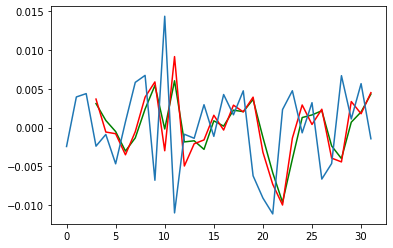

In [78]:
L_income = pd.DataFrame(L_income)
weighted_moving_average2 = L_income.rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)
exponential_smoothing2 = L_income.ewm(alpha=0.7, adjust=False, min_periods=3).mean().shift(1)

import matplotlib.pyplot as pyplot

pyplot.plot(weighted_moving_average2,color = 'green')
pyplot.plot(exponential_smoothing2,color = 'red')
pyplot.plot(L_income)

((L_income - weighted_moving_average2)**2).mean()**0.5


In [79]:
((L_income - exponential_smoothing2)**2).mean()**0.5

0    0.007615
dtype: float64

0    0.01053
dtype: float64

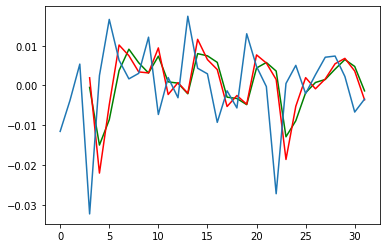

In [80]:
LM_income = pd.DataFrame(LM_income)
weighted_moving_average3 = LM_income.rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)
exponential_smoothing3 = LM_income.ewm(alpha=0.7, adjust=False, min_periods=3).mean().shift(1)

import matplotlib.pyplot as pyplot

pyplot.plot(weighted_moving_average3,color = 'green')
pyplot.plot(exponential_smoothing3,color = 'red')
pyplot.plot(LM_income)

((LM_income - weighted_moving_average2)**2).mean()**0.5

In [81]:
((LM_income - exponential_smoothing3)**2).mean()**0.5

0    0.013349
dtype: float64

0    0.001369
dtype: float64

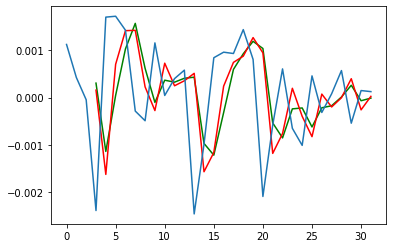

In [82]:
UM_income = pd.DataFrame(UM_income)
weighted_moving_average4 = UM_income.rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)
exponential_smoothing4 = UM_income.ewm(alpha=0.7, adjust=False, min_periods=3).mean().shift(1)

import matplotlib.pyplot as pyplot

pyplot.plot(weighted_moving_average4,color = 'green')
pyplot.plot(exponential_smoothing4,color = 'red')
pyplot.plot(UM_income)

((UM_income - weighted_moving_average4)**2).mean()**0.5

In [83]:
((UM_income - exponential_smoothing4)**2).mean()**0.5

0    0.001373
dtype: float64